# D-206 Performance Assesment

## by Paola Williams

#### Import the required packages

In [1]:
import pandas as pd
import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Downloads/hfy4k43ojf892f0dy7sd (1)/churn_raw_data.csv')

In [3]:
df.head(10)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5
5,6,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,...,184.401558,1039.357983,3,3,3,2,4,3,3,3
6,7,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,...,200.064886,1907.242972,6,5,6,4,1,5,5,5
7,8,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,...,114.754111,979.612708,2,2,2,5,2,3,4,5
8,9,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,...,118.366844,1312.874964,5,4,4,3,4,3,4,4
9,10,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,...,163.005280,508.763791,2,2,2,2,5,2,3,3


In [4]:
df.shape

(10000, 52)

In [5]:
df.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone   

In [7]:
#display all the columns of the dataset
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(df)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,Water engineer,1.0,39.0,Bachelor's Degree,Full Time,16667.58,Separated,Male,No,12.076460,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.628600,6468.457000,4,4,6,4,3,3,5,4
9999,10000,10000,T38070,9de5fb6e-bd33-4995-aec8-f01d0172a499,Clarkesville,GA,Habersham,30523,34.70783,-83.53648,12230,Urban,America/New_York,Personal assistant,1.0,28.0,GED or Alternative Credential,Full Time,NaN,Never Married,Male,No,12.641760,17,1,0,NaN,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Electronic Check,63.350860,218.371000,5857.586000,2,2,3,3,3,3,4,1


### Duplicates detection

In [8]:
#we will use 'Customer_id' to search for duplicates
dup = df.duplicated(subset='Customer_id')
dup.value_counts()

False    10000
dtype: int64

### Missing values detection

In [9]:
nulls = df.isnull().sum()
#include only the columns with nulls
nulls_count = nulls[nulls>0]
nulls_count.sort_values(ascending=False)

Children             2495
Income               2490
Techie               2477
Age                  2475
Phone                1026
Bandwidth_GB_Year    1021
TechSupport           991
Tenure                931
dtype: int64

In [10]:
#convert nulls_count to a dataframe
df1 = pd.DataFrame(data=nulls_count.index, columns=['Variable'])
df2 = pd.DataFrame(data=nulls_count.values, columns=['Count'])
nulls_df = pd.merge(df1, df2, left_index=True, right_index=True)
nulls_df.sort_values('Count', ascending=False)

,Variable,Count
0,Children,2495
2,Income,2490
3,Techie,2477
1,Age,2475
4,Phone,1026
7,Bandwidth_GB_Year,1021
5,TechSupport,991
6,Tenure,931


In [11]:
#calculate percentage of missing values
Perc = nulls_df['Count']/10000*100
nulls_df['Perc_nulls'] = Perc
nulls_df

,Variable,Count,Perc_nulls
0,Children,2495,24.95
1,Age,2475,24.75
2,Income,2490,24.90
3,Techie,2477,24.77
4,Phone,1026,10.26
5,TechSupport,991,9.91
6,Tenure,931,9.31
7,Bandwidth_GB_Year,1021,10.21


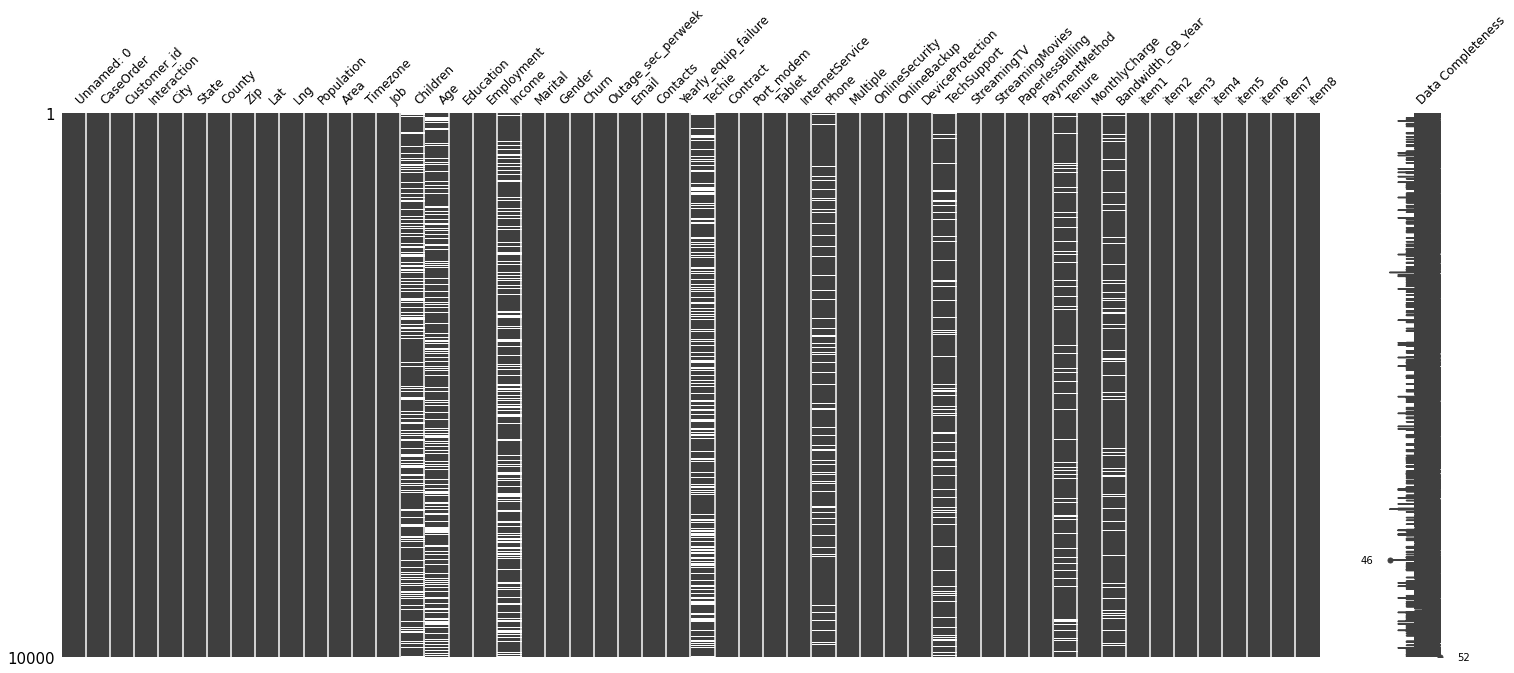

In [12]:
msno.matrix(df, fontsize=12, labels=True)
plt.show()

<AxesSubplot:>

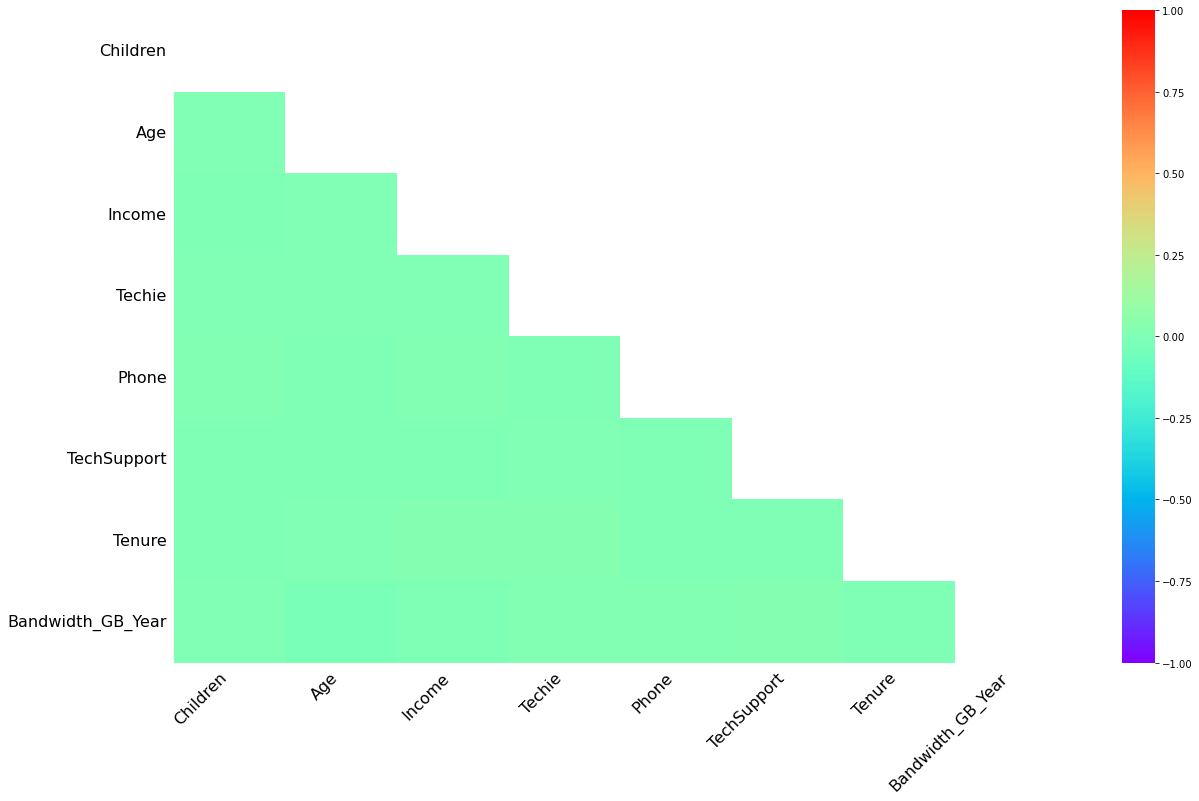

In [13]:
msno.heatmap(df, cmap='rainbow')

### Missing values treatment

#### Quantitative variables

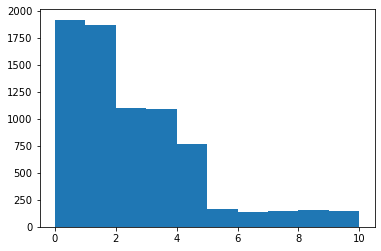

In [14]:
plt.hist(df['Children'])
plt.show()

In [15]:
df['Children'].fillna(df['Children'].median(), inplace=True)

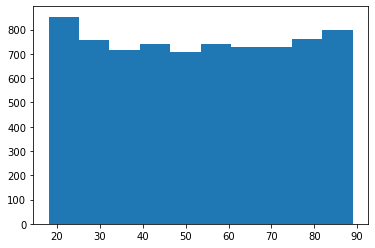

In [16]:
plt.hist(df['Age'])
plt.show()

In [17]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

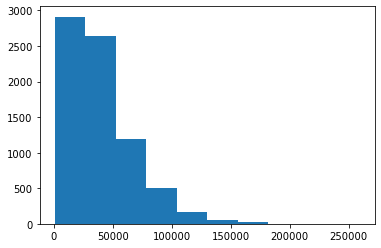

In [18]:
plt.hist(df['Income'])
plt.show()

In [19]:
df['Income'].fillna(df['Income'].median(), inplace=True)

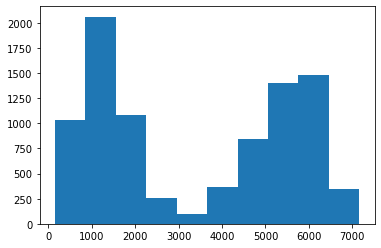

In [20]:
plt.hist(df['Bandwidth_GB_Year'])
plt.show()

In [21]:
df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].mode()[0])

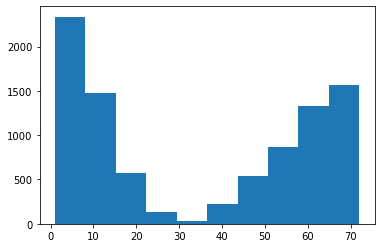

In [22]:
plt.hist(df['Tenure'])
plt.show()

In [23]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mode()[0])

#### Qualitative variables

In [24]:
df['Techie'] = df['Techie'].fillna(df['Techie'].mode()[0])

In [25]:
df['Phone'] = df['Phone'].fillna(df['Phone'].mode()[0])

In [26]:
df['TechSupport'] = df['TechSupport'].fillna(df['TechSupport'].mode()[0])

### Verification of treatment

#### Check for missing values

In [27]:
nulls = df.isnull().sum()
nulls

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

#### Check that distributions did not change drastically

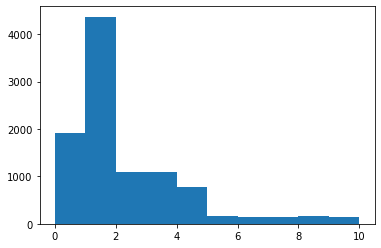

In [28]:
plt.hist(df['Children'])
plt.show()

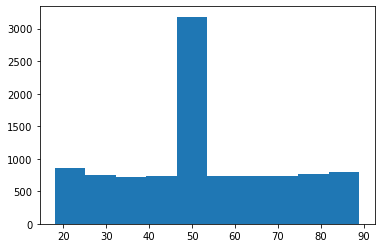

In [29]:
plt.hist(df['Age'])
plt.show()

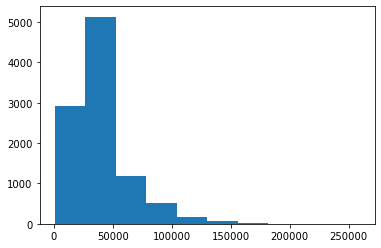

In [30]:
plt.hist(df['Income'])
plt.show()

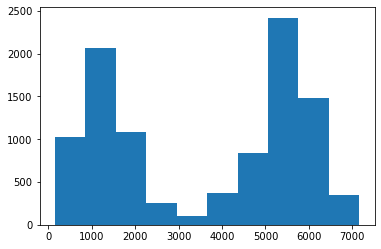

In [31]:
plt.hist(df['Bandwidth_GB_Year'])
plt.show()

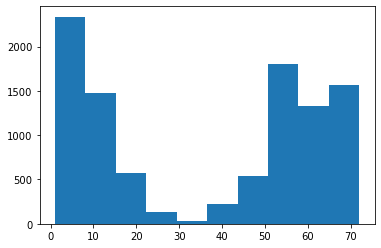

In [32]:
plt.hist(df['Tenure'])
plt.show()

#### Use matrix to visualize there are no more missing values

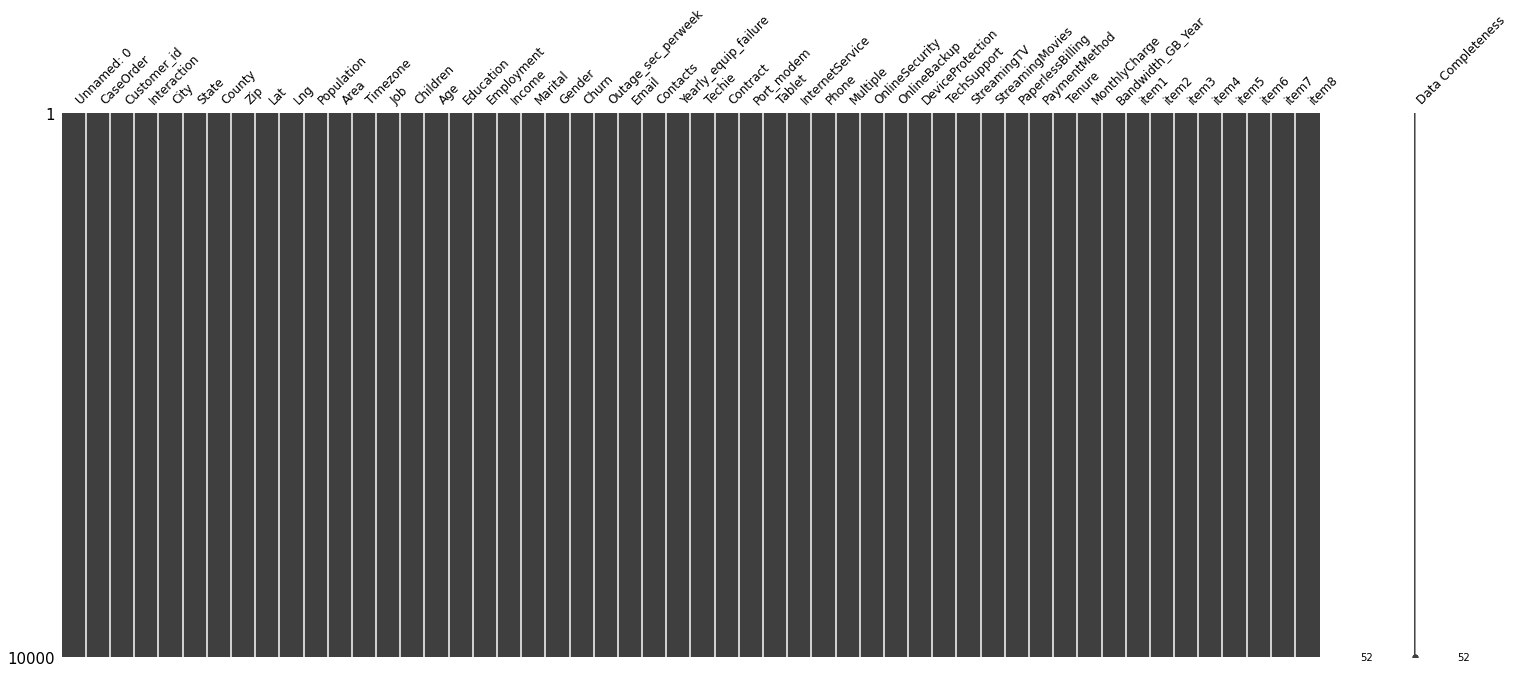

In [33]:
msno.matrix(df, fontsize=12, labels=True)
plt.show()

### Outliers detection

In [34]:
df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.822500,53.275748,38256.017897,11.452955,12.016000,0.994200,0.398000,36.449401,174.076305,3585.637484
std,1.925971,18.003063,24747.872761,7.025921,3.025898,0.988466,0.635953,25.903587,43.335473,2145.465461
min,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715
25%,1.000000,41.000000,23660.790000,8.054362,10.000000,0.000000,0.000000,8.700329,141.071078,1312.130487
50%,1.000000,53.275748,33186.785000,10.202896,12.000000,1.000000,0.000000,47.444800,169.915400,4472.303000
75%,3.000000,65.000000,45504.192500,12.487644,14.000000,2.000000,1.000000,60.153487,203.777441,5466.284500
max,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000


#### Z-Score and Boxplot for Children

In [35]:
df['Z_Score_Children']=stats.zscore(df['Children'])
df[['Children','Z_Score_Children']].head

<bound method NDFrame.head of       Children  Z_Score_Children
0          1.0         -0.427079
1          1.0         -0.427079
2          4.0          1.130655
3          1.0         -0.427079
4          0.0         -0.946323
...        ...               ...
9995       3.0          0.611410
9996       4.0          1.130655
9997       1.0         -0.427079
9998       1.0         -0.427079
9999       1.0         -0.427079

[10000 rows x 2 columns]>

In [36]:
sum((df.Z_Score_Children < -3) | (df.Z_Score_Children > 3))

302

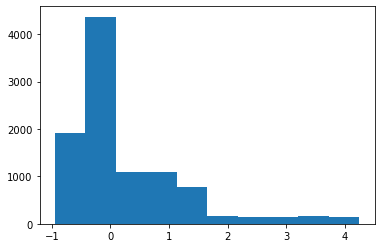

In [37]:
plt.hist(df['Z_Score_Children'])
plt.show()

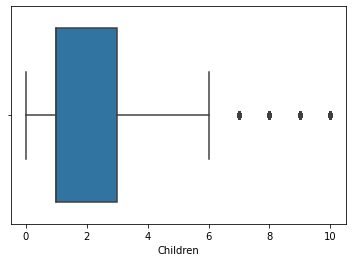

In [38]:
c =sns.boxplot(x='Children', data=df)

#### Z-Score and Boxplot for Age

In [39]:
df['Z_Score_Age']=stats.zscore(df['Age'])
df[['Age','Z_Score_Age']].head

<bound method NDFrame.head of             Age  Z_Score_Age
0     68.000000     0.817916
1     27.000000    -1.459588
2     50.000000    -0.181964
3     48.000000    -0.293062
4     83.000000     1.651149
...         ...          ...
9995  53.275748     0.000000
9996  48.000000    -0.293062
9997  53.275748     0.000000
9998  39.000000    -0.793002
9999  28.000000    -1.404039

[10000 rows x 2 columns]>

In [40]:
sum((df.Z_Score_Age < -3) | (df.Z_Score_Age > 3))

0

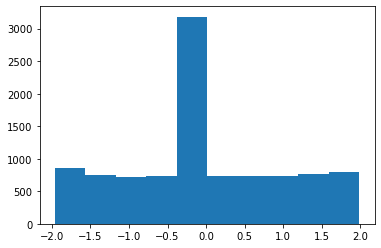

In [41]:
plt.hist(df['Z_Score_Age'])
plt.show()

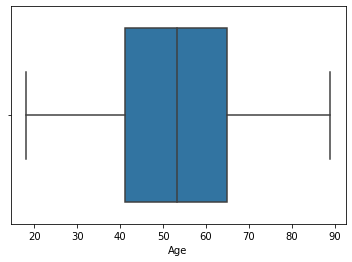

In [42]:
c =sns.boxplot(x='Age', data=df)

#### Z-Score and Boxplot for Income

In [43]:
df['Z_Score_Income']=stats.zscore(df['Income'])
df[['Income','Z_Score_Income']].head

<bound method NDFrame.head of          Income  Z_Score_Income
0     28561.990       -0.391731
1     21704.770       -0.668828
2     33186.785       -0.204845
3     18925.230       -0.781148
4     40074.190        0.073471
...         ...             ...
9995  55723.740        0.705863
9996  33186.785       -0.204845
9997  33186.785       -0.204845
9998  16667.580       -0.872379
9999  33186.785       -0.204845

[10000 rows x 2 columns]>

In [44]:
sum((df.Z_Score_Income < -3) | (df.Z_Score_Income > 3))

193

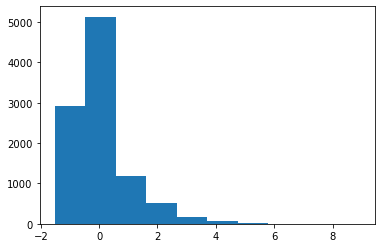

In [45]:
plt.hist(df['Z_Score_Income'])
plt.show()

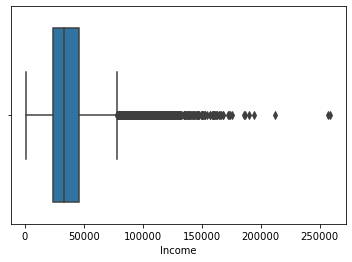

In [46]:
c =sns.boxplot(x='Income', data=df)

#### Z-Score and Boxplot for Outage_sec_perweek

In [47]:
df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])
df[['Outage_sec_perweek','Z_Score_Outage_sec_perweek']].head

<bound method NDFrame.head of       Outage_sec_perweek  Z_Score_Outage_sec_perweek
0               6.972566                   -0.637726
1              12.014541                    0.079935
2              10.245616                   -0.171849
3              15.206193                    0.534225
4               8.960316                   -0.354795
...                  ...                         ...
9995            9.265392                   -0.311372
9996            8.115849                   -0.474994
9997            4.837696                   -0.941598
9998           12.076460                    0.088748
9999           12.641760                    0.169211

[10000 rows x 2 columns]>

In [48]:
sum(df.Z_Score_Outage_sec_perweek < -3)

0

In [49]:
sum(df.Z_Score_Outage_sec_perweek > 3)

491

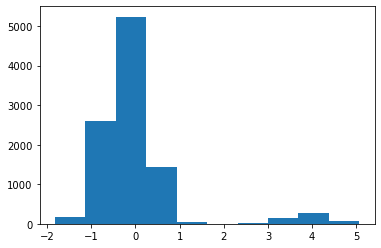

In [50]:
plt.hist(df['Z_Score_Outage_sec_perweek'])
plt.show()

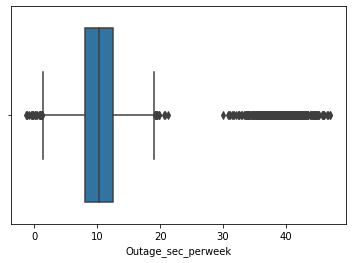

In [51]:
c =sns.boxplot(x='Outage_sec_perweek', data=df)

#### Z-Score and Boxplot for Email

In [52]:
df['Z_Score_Email']=stats.zscore(df['Email'])
df[['Email','Z_Score_Email']].head

<bound method NDFrame.head of       Email  Z_Score_Email
0        10      -0.666282
1        12      -0.005288
2         9      -0.996779
3        15       0.986203
4        16       1.316700
...     ...            ...
9995     12      -0.005288
9996     15       0.986203
9997     10      -0.666282
9998     14       0.655706
9999     17       1.647197

[10000 rows x 2 columns]>

In [53]:
sum((df.Z_Score_Email < -3) | (df.Z_Score_Email > 3))

12

In [54]:
sum(df.Z_Score_Email < -3)

9

In [55]:
sum(df.Z_Score_Email > 3)

3

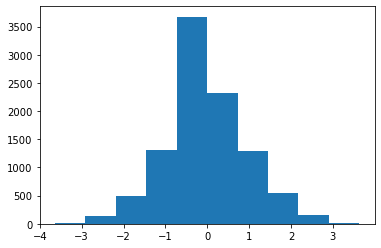

In [56]:
plt.hist(df['Z_Score_Email'])
plt.show()

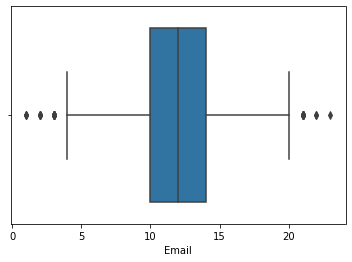

In [57]:
c =sns.boxplot(x='Email', data=df)

#### Z-Score and Boxplot for Contacts

In [58]:
df['Z_Score_Contacts']=stats.zscore(df['Contacts'])
df[['Contacts','Z_Score_Contacts']].head

<bound method NDFrame.head of       Contacts  Z_Score_Contacts
0            0         -1.005852
1            0         -1.005852
2            0         -1.005852
3            2          1.017588
4            2          1.017588
...        ...               ...
9995         2          1.017588
9996         2          1.017588
9997         0         -1.005852
9998         1          0.005868
9999         1          0.005868

[10000 rows x 2 columns]>

In [59]:
sum(df.Z_Score_Contacts > 3)

165

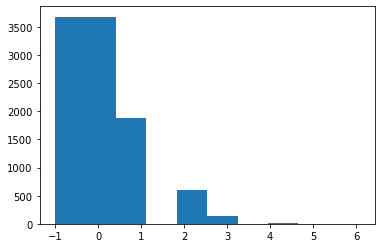

In [60]:
plt.hist(df['Z_Score_Contacts'])
plt.show()

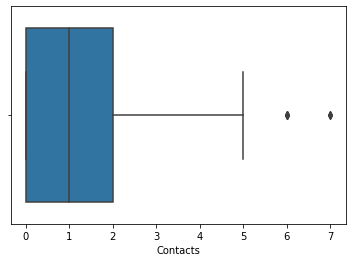

In [61]:
c =sns.boxplot(x='Contacts', data=df)

#### Z-Score and Boxplot for Yearly_equip_failure

In [62]:
df['Z_Score_Yearly_equip_failure']=stats.zscore(df['Yearly_equip_failure'])
df[['Yearly_equip_failure','Z_Score_Yearly_equip_failure']].head

<bound method NDFrame.head of       Yearly_equip_failure  Z_Score_Yearly_equip_failure
0                        1                      0.946658
1                        1                      0.946658
2                        1                      0.946658
3                        0                     -0.625864
4                        1                      0.946658
...                    ...                           ...
9995                     0                     -0.625864
9996                     0                     -0.625864
9997                     0                     -0.625864
9998                     0                     -0.625864
9999                     0                     -0.625864

[10000 rows x 2 columns]>

In [63]:
sum((df.Z_Score_Yearly_equip_failure < -3) | (df.Z_Score_Yearly_equip_failure > 3))

94

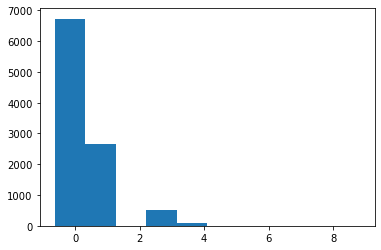

In [64]:
plt.hist(df['Z_Score_Yearly_equip_failure'])
plt.show()

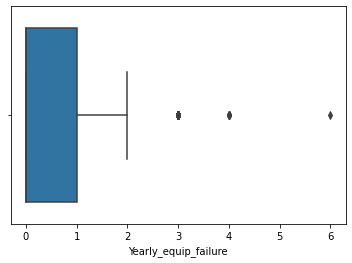

In [65]:
c =sns.boxplot(x='Yearly_equip_failure', data=df)

#### Z-Score and Boxplot for Tenure

In [66]:
df['Z_Score_Tenure']=stats.zscore(df['Tenure'])
df[['Tenure','Z_Score_Tenure']].head

<bound method NDFrame.head of          Tenure  Z_Score_Tenure
0      6.795513       -1.144836
1      1.156681       -1.362533
2     15.754144       -0.798974
3     17.087227       -0.747508
4      1.670972       -1.342678
...         ...             ...
9995  68.197130        1.225673
9996  61.040370        0.949374
9997  55.449910        0.733545
9998  71.095600        1.337573
9999  63.350860        1.038574

[10000 rows x 2 columns]>

In [67]:
sum((df.Z_Score_Tenure < -3) | (df.Z_Score_Tenure > 3))

0

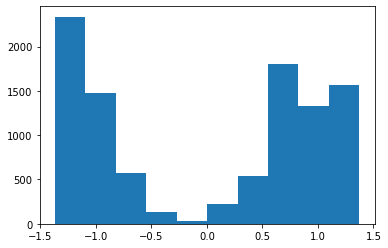

In [68]:
plt.hist(df['Z_Score_Tenure'])
plt.show()

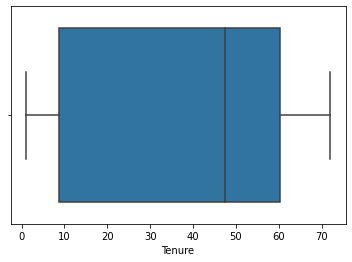

In [69]:
c =sns.boxplot(x='Tenure', data=df)

#### Z-Score and Boxplot for Bandwidth_GB_Yea

In [70]:
df['Z_Score_Bandwidth_GB_Year']=stats.zscore(df['Bandwidth_GB_Year'])
df[['Bandwidth_GB_Year','Z_Score_Bandwidth_GB_Year']].head

<bound method NDFrame.head of       Bandwidth_GB_Year  Z_Score_Bandwidth_GB_Year
0            904.536110                  -1.249722
1            800.982766                  -1.297991
2           2054.706961                  -0.713601
3           2164.579412                  -0.662387
4            271.493436                  -1.544798
...                 ...                        ...
9995        6511.253000                   1.363696
9996        5695.952000                   0.983665
9997        4159.306000                   0.267400
9998        6468.457000                   1.343747
9999        5857.586000                   1.059007

[10000 rows x 2 columns]>

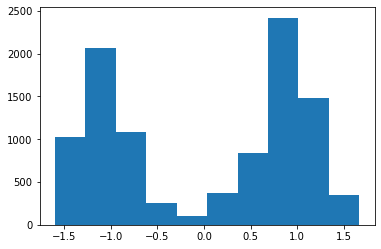

In [71]:
plt.hist(df['Z_Score_Bandwidth_GB_Year'])
plt.show()

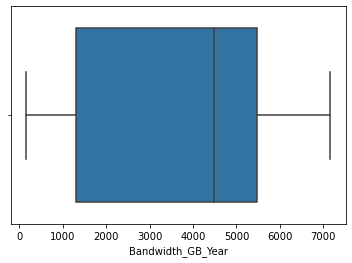

In [72]:
c =sns.boxplot(x='Bandwidth_GB_Year', data=df)

### Outliers treatment

#### Exclude Outliers in Outage_sec_perweek 

In [73]:
df[df['Outage_sec_perweek']<0]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,item8,Z_Score_Children,Z_Score_Age,Z_Score_Income,Z_Score_Outage_sec_perweek,Z_Score_Email,Z_Score_Contacts,Z_Score_Yearly_equip_failure,Z_Score_Tenure,Z_Score_Bandwidth_GB_Year
1904,1905,1905,I997253,fafc3cb0-9eb8-4455-8968-e68f70dff7e2,Merrimac,WI,Sauk,53561,43.39963,-89.64159,...,3,1.130655,0.000000,-0.032349,-1.800336,-1.657773,1.017588,-0.625864,-1.035532,-0.936844
1997,1998,1998,E582623,212475b8-76c0-4f65-a527-2e9776adaef2,Rocksprings,TX,Edwards,78880,29.97978,-100.28849,...,2,0.092166,-1.237393,1.050086,-1.678464,0.655706,1.017588,0.946658,-1.166818,-1.025757
3069,3070,3070,V877610,075760ea-9c4d-4294-b581-a1d6053437a5,Commerce,GA,Jackson,30529,34.21824,-83.48022,...,4,-0.946323,0.000000,0.500018,-1.659524,0.325209,-1.005852,-0.625864,-0.788740,-0.946931
3629,3630,3630,B167906,3d6987c2-c3ac-4358-af6c-d7ed3dcdfc84,Yauco,PR,Yauco,698,18.06728,-66.85273,...,4,0.092166,-1.126295,-0.431423,-1.651937,-0.996779,-1.005852,-0.625864,-1.126101,0.765715
4167,4168,4168,T491190,daef8dcf-dbf7-4f42-958e-d0ccc2f70803,Dallas,TX,Dallas,75215,32.75075,-96.75806,...,2,-0.427079,-1.237393,2.049796,-1.822134,-0.666282,-1.005852,-0.625864,-0.686265,-0.752319
4184,4185,4185,X342195,999b0b5d-dc39-4b0b-94da-6397f8e27286,Joint Base Mdl,NJ,Burlington,8640,40.00350,-74.58933,...,3,0.611410,-0.515257,-0.204845,-1.680346,-0.005288,1.017588,-0.625864,-1.163528,-1.263681
4427,4428,4428,V627981,aa81bf63-bd14-47b6-8137-700796f84a6f,El Prado,NM,Taos,87529,36.47006,-105.62270,...,4,-0.427079,0.484622,-1.433884,-1.786743,-0.666282,1.017588,-0.625864,-1.119294,-1.154099
6093,6094,6094,D115503,8db8e8dc-8afa-4ee1-b66d-03a09aa8356d,Putnam,OK,Dewey,73659,35.86958,-98.92300,...,5,1.130655,1.540051,-0.901972,-1.742217,-0.005288,0.005868,0.946658,0.504197,0.498311
6463,6464,6464,F943189,0ef28be3-fb5d-4d5b-84f8-9df9e6053345,Winger,MN,Polk,56592,47.53634,-96.00755,...,2,0.611410,1.928893,2.588901,-1.650770,2.308190,1.017588,-0.625864,0.557578,0.503491
6577,6578,6578,N725824,1ebe696b-a5e1-417e-877f-f1d37e5dedfe,Minneapolis,KS,Ottawa,67467,39.14259,-97.69275,...,2,0.092166,-0.570806,-0.944207,-1.705250,-0.666282,-1.005852,-0.625864,0.960261,0.889878


In [74]:
df.drop(df[df['Outage_sec_perweek']<0].index, inplace = True)

In [75]:
df[df['Outage_sec_perweek']<0]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,item8,Z_Score_Children,Z_Score_Age,Z_Score_Income,Z_Score_Outage_sec_perweek,Z_Score_Email,Z_Score_Contacts,Z_Score_Yearly_equip_failure,Z_Score_Tenure,Z_Score_Bandwidth_GB_Year


In [76]:
#create own dataframe for Outage_perweek outliers for separate analysis
df_outliers_outage = df.loc[df['Z_Score_Outage_sec_perweek'] > 3]

In [77]:
#remove outliers from original dataframe
df = df.drop(df_outliers_outage.index)
df

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,item8,Z_Score_Children,Z_Score_Age,Z_Score_Income,Z_Score_Outage_sec_perweek,Z_Score_Email,Z_Score_Contacts,Z_Score_Yearly_equip_failure,Z_Score_Tenure,Z_Score_Bandwidth_GB_Year
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,4,-0.427079,0.817916,-0.391731,-0.637726,-0.666282,-1.005852,0.946658,-1.144836,-1.249722
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,4,-0.427079,-1.459588,-0.668828,0.079935,-0.005288,-1.005852,0.946658,-1.362533,-1.297991
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,3,1.130655,-0.181964,-0.204845,-0.171849,-0.996779,-1.005852,0.946658,-0.798974,-0.713601
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,3,-0.427079,-0.293062,-0.781148,0.534225,0.986203,1.017588,-0.625864,-0.747508,-0.662387
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,5,-0.946323,1.651149,0.073471,-0.354795,1.316700,1.017588,0.946658,-1.342678,-1.544798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,3,0.611410,0.000000,0.705863,-0.311372,-0.005288,1.017588,-0.625864,1.225673,1.363696
9996,9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,5,1.130655,-0.293062,-0.204845,-0.474994,0.986203,1.017588,-0.625864,0.949374,0.983665
9997,9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,5,-0.427079,0.000000,-0.204845,-0.941598,-0.666282,-1.005852,-0.625864,0.733545,0.267400
9998,9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,4,-0.427079,-0.793002,-0.872379,0.088748,0.655706,0.005868,-0.625864,1.337573,1.343747


In [78]:
#verify outliers have been removed
sum(df.Z_Score_Outage_sec_perweek > 3)

0

#### Outliers replaced with median values

##### Email

In [79]:
a = df['Z_Score_Email']
df['Email'] = np.where(a < -3, df['Email'].median(), df['Email'])
df['Email'] = np.where(a > 3, df['Email'].median(), df['Email'])
df['Z_Score_Email']=stats.zscore(df['Email'])

In [80]:
sum((df.Z_Score_Email < -3) | (df.Z_Score_Email > 3))

0

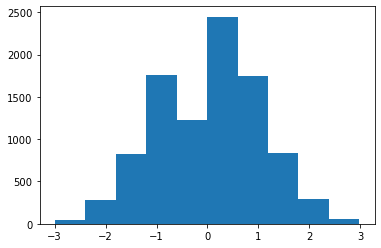

In [81]:
plt.hist(df['Z_Score_Email'])
plt.show()

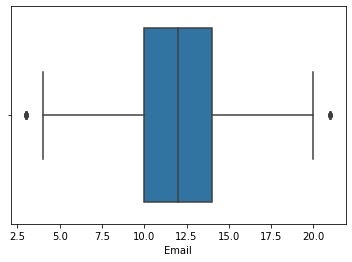

In [82]:
c =sns.boxplot(x='Email', data=df)

##### MonthlyCharge

In [83]:
df['Z_Score_MonthlyCharge']=stats.zscore(df['MonthlyCharge'])
df[['MonthlyCharge','Z_Score_MonthlyCharge']].head

<bound method NDFrame.head of       MonthlyCharge  Z_Score_MonthlyCharge
0        171.449762              -0.032210
1        242.948015               1.629685
2        159.440398              -0.311354
3        120.249493              -1.222302
4        150.761216              -0.513092
...             ...                    ...
9995     159.828800              -0.302326
9996     208.856400               0.837265
9997     168.220900              -0.107261
9998     252.628600               1.854700
9999     218.371000               1.058421

[9498 rows x 2 columns]>

In [84]:
sum((df.Z_Score_MonthlyCharge < -3) | (df.Z_Score_MonthlyCharge > 3))

0

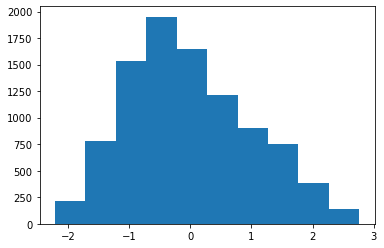

In [85]:
plt.hist(df['Z_Score_MonthlyCharge'])
plt.show()

MonthlyCharge outlier treatment

In [86]:
df[df.Z_Score_MonthlyCharge >3]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,Z_Score_Children,Z_Score_Age,Z_Score_Income,Z_Score_Outage_sec_perweek,Z_Score_Email,Z_Score_Contacts,Z_Score_Yearly_equip_failure,Z_Score_Tenure,Z_Score_Bandwidth_GB_Year,Z_Score_MonthlyCharge


In [87]:
df['MonthlyCharge'].median()

168.36315000000002

In [88]:
df['MonthlyCharge'] = np.where(df['MonthlyCharge'] > 3, df['MonthlyCharge'].median(), df['MonthlyCharge'])

In [89]:
sum(df.Z_Score_MonthlyCharge > 3)

0

In [90]:
df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].describe()

,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,9498.000000,9498.000000,9498.000000,9498.000000,9498.000000,9498.000000,9.498000e+03,9498.000000
mean,1.820278,53.347268,38183.758433,10.041186,0.395452,36.428779,1.683632e+02,3583.153956
std,1.928112,18.038581,24622.200370,3.172513,0.633776,25.916979,3.115183e-11,2146.221448
min,0.000000,18.000000,740.660000,0.113821,0.000000,1.000259,1.683632e+02,155.506715
25%,1.000000,41.000000,23704.880000,7.934760,0.000000,8.691499,1.683632e+02,1309.752701
50%,1.000000,53.275748,33186.785000,9.995043,0.000000,47.362925,1.683632e+02,4468.890000
75%,3.000000,66.000000,45275.980000,12.089657,1.000000,60.173462,1.683632e+02,5466.014750
max,10.000000,89.000000,258900.700000,32.441070,6.000000,71.999280,1.683632e+02,7158.982000


### PCA 

In [91]:
#create a new dataframe with numerical variables
df_pca = df[['Children', 'Population', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8']]

In [92]:
#normalize the dataframe
df_pca_norm = (df_pca-(df_pca.mean()))/df_pca.std()
df_pca_norm

,Children,Population,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,-0.425431,-0.673529,0.812300,-0.390776,-0.967252,0.953883,-1.143392,-0.999947,-1.248062,1.450469,1.439676,1.469516,-0.480792,0.491611,0.488340,-0.496846,0.491884
1,-0.425431,0.046297,-1.460606,-0.669274,0.622016,0.953883,-1.360965,-0.999947,-1.296311,-0.473362,0.474268,-0.480123,-0.480792,0.491611,-0.480183,0.476152,0.491884
2,1.130495,-0.417842,-0.185562,-0.202946,0.064438,0.953883,-0.797725,-0.999947,-0.712157,0.488553,0.474268,-1.454942,0.492267,0.491611,-0.480183,-0.496846,-0.480014
3,-0.425431,0.282619,-0.296435,-0.782161,1.628049,-0.623961,-0.746289,-0.999947,-0.660964,0.488553,0.474268,0.494697,-1.453851,1.464182,0.488340,-0.496846,-0.480014
4,-0.944073,0.108957,1.643851,0.076778,-0.340698,0.953883,-1.341121,-0.999947,-1.543019,0.488553,0.474268,0.494697,-0.480792,0.491611,0.488340,0.476152,1.463782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.611853,-0.631894,-0.003965,0.712365,-0.244536,-0.623961,1.225774,-0.999947,1.364304,-0.473362,-1.456549,-0.480123,-0.480792,0.491611,-0.480183,-1.469843,-0.480014
9996,1.130495,4.660847,-0.296435,-0.202946,-0.606881,-0.623961,0.949632,-0.999947,0.984427,0.488553,1.439676,1.469516,0.492267,0.491611,1.456864,-1.469843,1.463782
9997,-0.425431,-0.648078,-0.003965,-0.202946,-1.640179,-0.623961,0.733925,-0.999947,0.268449,0.488553,0.474268,0.494697,0.492267,0.491611,0.488340,0.476152,1.463782
9998,-0.425431,1.784240,-0.795366,-0.873853,0.641534,-0.623961,1.337610,-0.999947,1.344364,0.488553,0.474268,2.444336,0.492267,-0.480961,-0.480183,1.449150,0.491884


In [93]:
pca = PCA(n_components=df_pca.shape[1])

In [94]:
#number of components
pca.fit(df_pca_norm)

PCA(n_components=17)

In [95]:
df_pca = pd.DataFrame(pca.transform(df_pca_norm), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,1.942507,-1.435715,1.913982,-0.582100,0.794646,1.227752,0.257983,-0.820469,-0.217385,0.180576,-0.910421,0.205327,-0.161206,-0.024440,-0.008780,0.029608,3.153843e-16
1,-0.229201,-1.776437,0.606376,0.218256,0.824194,-1.144717,0.766745,-0.124491,-1.186702,0.589495,0.779419,-0.427299,0.193130,-0.464562,-0.655609,0.006811,5.585673e-16
2,-0.675837,-1.034672,0.254488,1.061264,0.982038,0.211907,0.507048,-0.125058,0.291488,-0.114464,-0.413843,-0.325119,0.986695,-1.362497,0.390326,-0.019709,3.239831e-16
3,0.009549,-0.686225,2.245820,-0.659146,0.593254,-1.645599,-0.581925,0.554623,0.038230,-0.271637,0.232414,0.797140,0.427903,0.264789,-0.032973,-0.037922,3.113051e-16
4,1.337290,-1.931805,0.839424,-1.450871,0.620031,1.435567,0.249753,0.426424,-0.106981,1.151454,0.391133,0.012184,0.139416,0.235613,-0.109439,0.095227,4.986910e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,-2.086792,1.797365,0.072561,0.790982,-0.492831,0.364891,-0.739387,-0.090025,0.283110,0.357069,-0.629286,0.548329,-0.083980,0.521674,0.650184,-0.106224,2.360410e-16
9494,1.928201,1.460088,0.717458,-0.825719,-2.361070,-1.511146,3.117463,1.378209,2.086695,0.863860,-1.976215,0.697720,0.510527,0.455628,-0.809771,-0.010484,3.971981e-16
9495,1.463077,0.705080,-0.038367,-0.297770,-0.828121,0.634962,-0.340646,-1.466334,-0.141586,1.185172,-0.113327,-0.346311,0.560864,0.274753,-0.089707,0.306697,2.341988e-16
9496,1.993181,1.946044,-0.080228,-0.866853,-0.684543,-1.844995,0.845081,0.274012,0.202512,-0.568013,0.291981,-1.511287,-1.147304,1.146521,-0.315040,-0.014108,9.681071e-16


#### PCA Loadings

In [96]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'], index=df_pca_norm.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Children,2.749095e-03,-4.438485e-03,1.275062e-02,7.186362e-01,1.036218e-01,-5.397130e-03,1.298134e-01,3.887821e-02,6.714365e-01,3.965377e-02,-2.740738e-02,-2.228020e-02,1.358133e-02,1.417913e-02,-8.549679e-03,1.170251e-02,-1.412332e-19
Population,-1.148251e-03,-3.387134e-04,2.167856e-02,-3.128490e-01,-4.160091e-01,-2.519566e-01,6.559818e-01,4.107085e-01,2.496790e-01,-5.358104e-02,2.269610e-02,-1.654102e-02,3.591497e-04,-1.019234e-02,-2.258500e-03,2.542744e-03,8.334636e-17
Age,6.136733e-03,-1.108891e-02,-1.666492e-02,-4.867105e-01,1.996016e-01,5.921318e-01,-2.155756e-01,2.168088e-01,5.263393e-01,-2.642193e-02,-4.681490e-07,-2.923977e-03,-1.078595e-02,8.410399e-03,1.814754e-02,-2.187563e-02,1.646682e-17
Income,-3.018580e-04,6.449125e-03,1.918723e-02,3.594718e-01,-4.341959e-01,4.419943e-01,-1.810681e-01,5.908990e-01,-3.170337e-01,1.011535e-02,-6.106036e-02,-5.327447e-03,-4.015413e-03,1.135194e-02,3.915209e-03,-2.845909e-03,3.428336e-17
Outage_sec_perweek,-2.182765e-02,1.522913e-02,-1.752699e-02,-2.483789e-02,4.766309e-01,-5.084839e-01,-3.040088e-01,6.425038e-01,-2.492848e-02,-7.162661e-02,2.300007e-02,-2.259121e-02,-3.995747e-03,2.055262e-02,9.741248e-03,8.813495e-03,3.798288e-17
Yearly_equip_failure,-5.478441e-03,1.181611e-02,5.382070e-04,1.046263e-01,5.985442e-01,3.573757e-01,6.160662e-01,1.210358e-01,-3.287260e-01,5.115477e-03,1.857897e-03,-1.623693e-02,3.877052e-04,8.289466e-03,-1.706752e-02,3.065454e-03,5.626954e-17
Tenure,-9.515666e-03,7.006502e-01,-9.171573e-02,-1.476967e-02,-1.088725e-02,1.760187e-02,-4.995467e-03,-8.982690e-03,1.314841e-02,5.297007e-03,-6.824167e-03,5.070318e-03,-1.796244e-02,6.132888e-03,9.670669e-03,7.064756e-01,-3.146502e-17
MonthlyCharge,4.336809e-19,1.537310e-30,-5.551115e-17,4.163336e-17,-1.873501e-16,6.288373e-18,-9.714451e-17,-1.821460e-16,2.775558e-17,-1.665335e-16,-1.110223e-16,5.551115e-17,-4.857226e-17,2.775558e-17,-1.110223e-16,-8.326673e-17,-1.000000e+00
Bandwidth_GB_Year,-1.386653e-02,7.006645e-01,-9.284410e-02,1.010719e-02,-6.706854e-03,-7.560361e-03,5.253798e-03,-6.829450e-03,8.454612e-03,4.723399e-03,3.581381e-03,8.201996e-03,3.551569e-03,-4.757440e-03,-1.776672e-03,-7.069414e-01,1.980903e-17
item1,4.589173e-01,4.150772e-02,2.789211e-01,8.555277e-03,2.104774e-02,-8.398436e-03,8.007162e-03,-5.545797e-03,-7.624359e-03,-7.041241e-02,-1.123135e-01,-4.723804e-02,2.304470e-02,-2.483029e-01,7.919010e-01,-6.250291e-03,-2.362243e-17


#### Selecting PCs

In [97]:
cov_matrix = np.dot(df_pca_norm.T, df_pca_norm)/df_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

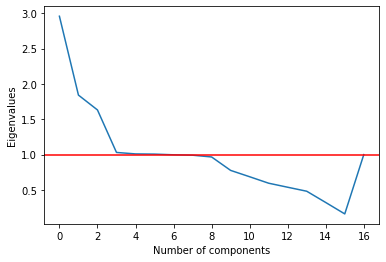

In [98]:
plt.plot(eigenvalues)
plt.axhline(y = 1 , color = 'r')
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')
plt.show()

In [99]:
df.to_csv(r'Desktop/churn_clean_data.csv')

In [100]:
#outliers excluded
df_outliers_outage.to_csv(r'Desktop/churn_outliers_data.csv')